In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

from gower.gower_dist import *

# Simple example from D'Orazio

In [2]:
df = pd.DataFrame({"Sex1": ["M", "M", "F", "F", "F", "M", "M", "F", "F", "F"],
                   "Sex2": ["M", "M", "F", "F", "F", "F", "F", "M", "M", "M"],
                   "Age1": [15] * 10,
                   "Age2": [15, 36, 58, 78, 100, 15, 36, 58, 78, 100]})
df

,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
5,M,F,15,15
6,M,F,15,36
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


In [3]:
distances = np.diag(gower_matrix(df[["Sex1", "Age1"]].to_numpy(), df[["Sex2", "Age2"]].to_numpy(), weight="uniform"))
print(distances)
df.loc[np.argsort(distances)]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.12352941 0.25294118 0.37058824 0.5        0.5
 0.62352941 0.75294118 0.87058824 1.        ]


,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
5,M,F,15,15
6,M,F,15,36
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


In [4]:
distances = np.diag(gower_matrix(df[["Sex1", "Age1"]].to_numpy(), df[["Sex2", "Age2"]].to_numpy(), R=(25, 75)))
print(distances)
df.loc[np.argsort(distances)]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.44804222 0.91741978 0.91741978 0.91741978 0.08258022
 0.53062244 1.         1.         1.        ]


,Sex1,Sex2,Age1,Age2
0,M,M,15,15
5,M,F,15,15
1,M,M,15,36
6,M,F,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


# Some plots

In [5]:
colors = mcolors._colors_full_map
MAX = 40

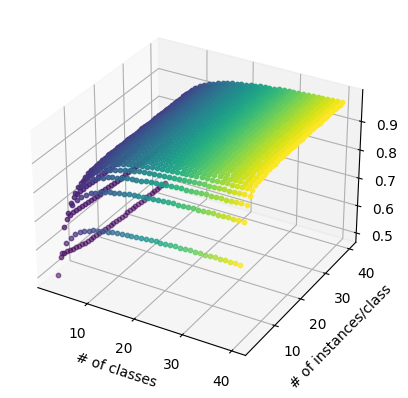

In [6]:
ax = plt.axes(projection="3d")

for i in range(2, MAX + 1):
    X = []
    for j in range(2, MAX + 1):
        x = get_cat_weight(list(''.join(chr(k) for k in range(i))) * j)
        ax.scatter3D(i, j, x, alpha=0.9 * x + 0.1, c=i, s=10, vmin=1, vmax=MAX)
        X.append(x)
ax.set_xlabel("# of classes")
ax.set_ylabel("# of instances/class")
ax.set_zlabel("Weight")

plt.show()

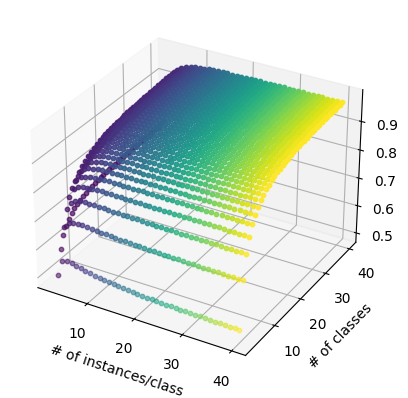

In [7]:
ax = plt.axes(projection="3d")

for i in range(2, MAX + 1):
    X = []
    for j in range(2, MAX + 1):
        x = get_cat_weight(list(''.join(chr(k) for k in range(i))) * j)
        ax.scatter3D(j, i, x, alpha=0.9 * x + 0.1, c=j, s=10, vmin=1, vmax=MAX)
        X.append(x)
ax.set_ylabel("# of classes")
ax.set_xlabel("# of instances/class")
ax.set_zlabel("Weight")

plt.show()

# Dog adoption dataset

In [8]:
dd = pd.read_csv("dog_adoption/allDogDescriptions.csv", index_col=0)
dd.set_index("id", inplace=True, drop=True)


# get rid of columns with the most destructive nans

def isolate_nans(column):
    all_other_nans = nans[[c for c in cols if c != column]].sum(axis=1)
    mask = all_other_nans < np.median(all_other_nans)
    mask &= nans[column]
    return mask.sum()


nans = dd.isna()
cols = dd.columns
isolated_nans = {c: isolate_nans(c) for c in cols}
median_count = np.median([v for v in isolated_nans.values() if v > 0])
for column, count in isolated_nans.items():
    if count > median_count:
        print(column)
        dd.drop(column, axis=1, inplace=True)
dd.dropna(inplace=True)  # dd.mode().iloc[0]

# make bools strings

is_bool = dd.dtypes == bool
dd.loc[:, is_bool] = dd[dd.columns[is_bool]].astype(str)

dd.dtypes

breed_secondary
color_primary
color_secondary
color_tertiary
declawed
env_cats


org_id             object
url                object
type.x             object
species            object
breed_primary      object
breed_mixed        object
breed_unknown      object
age                object
sex                object
size               object
coat               object
fixed              object
house_trained      object
special_needs      object
shots_current      object
env_children       object
env_dogs           object
name               object
status             object
posted             object
contact_city       object
contact_state      object
contact_zip        object
contact_country    object
stateQ             object
accessed           object
type.y             object
description        object
dtype: object

We can also use the categorical weight function to measure the performance
of clustering algorithms and thereby tune the parameters of DBSCAN.

In [9]:
matrix = gower_matrix(dd.to_numpy(), chunksize=20)

  0%|          | 0/28 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/13729 [00:00<?, ?it/s]

In [10]:
pd.DataFrame(matrix, index=dd.index, columns=dd.index).describe()

id,46039306,46039304,46039303,46039302,46039301,46038709,46038708,46038703,46038700,46034532,...,40007347,38637037,37985914,37680518,37484234,37462427,36112336,28351171,27329619,25303346
count,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,...,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000
mean,0.892859,0.852932,0.870132,0.867180,0.867807,0.867202,0.867796,0.870121,0.867180,0.853642,...,0.855553,0.874738,0.858073,0.850842,0.835668,0.848256,0.840637,0.859424,0.899608,0.871173
std,0.048822,0.056114,0.051411,0.054288,0.056011,0.054266,0.056021,0.051419,0.054308,0.059035,...,0.055209,0.050910,0.054982,0.050581,0.056093,0.054905,0.050079,0.050863,0.043653,0.044707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.866842,0.820250,0.836728,0.832031,0.832031,0.832031,0.832031,0.836728,0.832031,0.818400,...,0.818362,0.839979,0.824845,0.821281,0.798132,0.816485,0.808882,0.830322,0.871289,0.844448
50%,0.896004,0.858630,0.874176,0.874176,0.870956,0.874176,0.870956,0.874176,0.874176,0.857356,...,0.858555,0.871046,0.857774,0.853859,0.836728,0.853934,0.842349,0.864525,0.901625,0.875001
75%,0.919413,0.892890,0.910927,0.904216,0.907156,0.904216,0.907156,0.910927,0.904216,0.892874,...,0.896004,0.910002,0.896655,0.885578,0.874176,0.886586,0.874176,0.894487,0.936293,0.897511
max,0.995460,0.999979,0.999979,0.999979,0.995460,0.999979,0.995460,0.999979,0.999979,0.989839,...,0.990820,0.988578,0.995460,0.986301,0.984059,0.986301,0.999979,0.989839,0.995460,0.990820


In [11]:
samples = [{"eps": z / 10, "min_samples": a} for z in range(1, 11) for a in range(1, 11)]
results = process_map(partial(do_it, matrix=matrix), samples, chunksize=1)
best_params = max(results, key=lambda z: z[1])
best_params

  0%|          | 0/100 [00:00<?, ?it/s]

({'eps': 0.5, 'min_samples': 1}, 0.9078390917547138)

In [12]:
results

[({'eps': 0.1, 'min_samples': 1}, 0.0),
 ({'eps': 0.1, 'min_samples': 2}, 0),
 ({'eps': 0.1, 'min_samples': 3}, 0),
 ({'eps': 0.1, 'min_samples': 4}, 0),
 ({'eps': 0.1, 'min_samples': 5}, 0),
 ({'eps': 0.1, 'min_samples': 6}, 0),
 ({'eps': 0.1, 'min_samples': 7}, 0),
 ({'eps': 0.1, 'min_samples': 8}, 0),
 ({'eps': 0.1, 'min_samples': 9}, 0),
 ({'eps': 0.1, 'min_samples': 10}, 0),
 ({'eps': 0.2, 'min_samples': 1}, 0.0009104814625974234),
 ({'eps': 0.2, 'min_samples': 2}, 0.0009104814625974234),
 ({'eps': 0.2, 'min_samples': 3}, 0),
 ({'eps': 0.2, 'min_samples': 4}, 0),
 ({'eps': 0.2, 'min_samples': 5}, 0),
 ({'eps': 0.2, 'min_samples': 6}, 0),
 ({'eps': 0.2, 'min_samples': 7}, 0),
 ({'eps': 0.2, 'min_samples': 8}, 0),
 ({'eps': 0.2, 'min_samples': 9}, 0),
 ({'eps': 0.2, 'min_samples': 10}, 0),
 ({'eps': 0.3, 'min_samples': 1}, 0.21714837797314568),
 ({'eps': 0.3, 'min_samples': 2}, 0.21714837797314568),
 ({'eps': 0.3, 'min_samples': 3}, 0.13159953974749194),
 ({'eps': 0.3, 'min_samples'

In [13]:
dd["gower_dbscan"] = DBSCAN(metric="precomputed", **best_params[0]).fit_predict(matrix)
print(get_cat_weight(dd["gower_dbscan"]))
np.unique(dd["gower_dbscan"], return_counts=True)

0.9078390917547138


(array([   0,    1,    2, ..., 2034, 2035, 2036]),
 array([ 19, 101,   2, ...,   5,   1,   1]))

In [14]:
dd["label_count"] = dd.groupby("gower_dbscan").transform("count").iloc[:, 0]
dd.sort_values(["label_count", "gower_dbscan"], ascending=[False, True], inplace=True)
dd

,org_id,url,type.x,species,breed_primary,breed_mixed,breed_unknown,age,sex,size,...,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description,gower_dbscan,label_count
id,,,,,,,,,,,,,,,,,,,,,
46021535,TX2394,https://www.petfinder.com/dog/brody-bear-46021...,Dog,Dog,Schnauzer,True,False,Baby,Male,Small,...,Brattleboro,VT,05301,US,CT,2019-09-20,Dog,Howdy! Caught you looking! My name is Brody! ...,234,250
46021378,TX2394,https://www.petfinder.com/dog/brody-46021378/c...,Dog,Dog,Schnauzer,True,False,Baby,Male,Small,...,Groton,CT,06340,US,CT,2019-09-20,Dog,Howdy! Caught you looking! My name is Brody! ...,234,250
46021361,TX2394,https://www.petfinder.com/dog/daisey-may-46021...,Dog,Dog,Weimaraner,True,False,Young,Female,Medium,...,Brattleboro,VT,05301,US,CT,2019-09-20,Dog,Howdy! Caught you looking! My name is Daisey M...,234,250
46021331,TX2394,https://www.petfinder.com/dog/daisey-mae-46021...,Dog,Dog,Weimaraner,True,False,Young,Female,Medium,...,Boston,MA,02128,US,CT,2019-09-20,Dog,Howdy! Caught you looking! My name is Daisey M...,234,250
46021276,TX2394,https://www.petfinder.com/dog/daisey-mae-3-460...,Dog,Dog,Weimaraner,True,False,Young,Female,Medium,...,Groton,CT,06340,US,CT,2019-09-20,Dog,Howdy! Caught you looking! My name is Daisey M...,234,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45070846,WV80,https://www.petfinder.com/dog/manie-45070846/w...,Dog,Dog,Terrier,True,False,Adult,Male,Small,...,Scott Depot,WV,25560,US,WV,2019-09-20,Dog,Manie's birthday is 6/21/2018. He likes attent...,2030,1
44531731,WV04,https://www.petfinder.com/dog/coco-44531731/wv...,Dog,Dog,Pit Bull Terrier,True,False,Adult,Female,Medium,...,Fairmont,WV,26554,US,WV,2019-09-20,Dog,If you'd like to learn more about one of our a...,2031,1
44175060,WV37,https://www.petfinder.com/dog/skylee-44175060/...,Dog,Dog,Pug,True,False,Senior,Female,Medium,...,Dellslow,WV,26531,US,WV,2019-09-20,Dog,"Hi Skylee !! ??\nSkylee is a senior girl, who ...",2032,1


# Pokemon dataset

In [15]:
pokemon = pd.read_csv("pokemon/pokemon_alopez247.csv")

for c in pokemon.columns[pokemon.dtypes != object]:
    pokemon.loc[pokemon[c].isna(), c] = np.nanmedian(pokemon[c])
for c in pokemon.columns[pokemon.dtypes == object]:
    pokemon.loc[pokemon[c].isna(), c] = "none"

matrix2 = gower_matrix(pokemon.to_numpy(), knn=True, chunksize=20)
samples = [{"eps": 0.1 * z / 1000, "min_samples": 1} for z in range(1, 1001)]
results2 = process_map(partial(do_it, matrix=matrix2), samples, chunksize=20)
best_params2 = max(results2, key=lambda z: z[1])
print(best_params2)
pokemon["gower_dbscan"] = DBSCAN(metric="precomputed", **best_params2[0]).fit_predict(matrix2)
_, counts2 = np.unique(pokemon["gower_dbscan"], return_counts=True)
np.unique(counts2, return_counts=True)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/721 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

({'eps': 0.051300000000000005, 'min_samples': 1}, 0.5029482128989685)


(array([  1,   2,   3,   4,   5,   8,  18,  31,  34,  79,  95, 112]),
 array([228,  29,   9,   4,   3,   1,   1,   1,   1,   1,   1,   1]))

In [16]:
pokemon["label_count"] = pokemon.groupby("gower_dbscan").transform("count").iloc[:, 0]
pokemon.sort_values(["label_count", "gower_dbscan"], ascending=[False, True], inplace=True)
pokemon


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,gower_dbscan,label_count
161,162,Furret,Normal,none,415,85,76,64,45,55,...,0.5,Field,none,False,1.80,32.5,90,quadruped,59,112
261,262,Mightyena,Dark,none,420,70,90,70,60,60,...,0.5,Field,none,False,0.99,37.0,127,quadruped,59,112
263,264,Linoone,Normal,none,420,78,70,61,50,61,...,0.5,Field,none,False,0.51,32.5,90,quadruped,59,112
270,271,Lombre,Water,Grass,340,60,50,50,60,70,...,0.5,Water_1,Grass,False,1.19,32.5,120,bipedal_tailless,59,112
273,274,Nuzleaf,Grass,Dark,340,70,70,40,60,40,...,0.5,Field,Grass,False,0.99,28.0,120,bipedal_tailless,59,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,706,Goodra,Dragon,none,600,90,100,70,110,150,...,0.5,Dragon,none,False,2.01,150.5,45,bipedal_tailed,275,1
712,713,Avalugg,Ice,none,514,95,117,184,44,46,...,0.5,Monster,none,False,2.01,505.0,55,quadruped,276,1
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,0.5,Undiscovered,none,False,5.00,305.0,3,serpentine_body,277,1
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0.5,Undiscovered,none,True,0.71,8.8,3,head_arms,278,1


In [17]:
get_cat_weight(dd["gower_dbscan"])


0.9078390917547138

In [18]:
get_cat_weight(pokemon["gower_dbscan"])


0.5029482128989685

In [35]:
laptops = pd.read_csv("laptops/laptops_train.csv", index_col=0)
print(laptops.shape)
print(laptops.apply(lambda col: col.unique(), axis=0).apply(len))
laptops.drop("Operating System Version", axis=1, inplace=True)

matrix3 = gower_matrix(laptops.to_numpy(), R=(25, 75), chunksize=20)  # worse without R
samples = [{"eps": z / 1000, "min_samples": 1} for z in range(1, 1001)]
results3 = process_map(partial(do_it, matrix=matrix3), samples, chunksize=20)
best_params3 = max(results3, key=lambda z: z[1])
print(best_params3)
laptops["gower_dbscan"] = DBSCAN(metric="precomputed", **best_params3[0]).fit_predict(matrix3)
_, counts3 = np.unique(laptops["gower_dbscan"], return_counts=True)
np.unique(counts3, return_counts=True)

(977, 12)
Model Name                  488
Category                      6
Screen Size                  18
Screen                       38
CPU                         106
RAM                           8
 Storage                     36
GPU                          98
Operating System              7
Operating System Version      5
Weight                      166
Price                       639
dtype: int64


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/977 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

({'eps': 0.017, 'min_samples': 1}, 0.7206485515340502)


(array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  13,  14,  15,
         16,  24,  26,  30,  31,  55,  86, 251, 260]),
 array([9, 1, 6, 3, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]))

In [36]:
laptops["label_count"] = laptops.groupby("gower_dbscan").transform("count").iloc[:, 0]
laptops.sort_values(["label_count", "gower_dbscan"], ascending=[False, True], inplace=True)
laptops


,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,gower_dbscan,label_count
Manufacturer,,,,,,,,,,,,,
HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00,2,260
Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,2.1kg,3556800.00,2,260
HP,250 G6,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,3502558.80,2,260
HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,3067651.08,2,260
Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows,2.2kg,4436218.80,2,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Google,Pixelbook (Core,Ultrabook,"12.3""",Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8GB,128GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,11337300.00,36,1
HP,Envy 13-AB002nv,Ultrabook,"13.3""",IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows,1.34kg,11764116.00,37,1
Lenovo,Legion Y520-15IKBN,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050M,Windows,2.5kg,9861228.00,39,1
